# Data Preprocess

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import glob
#import cv2
from tensorflow.keras.preprocessing import image
import os

In [2]:
import pandas as pd
cols = ["bedrooms","bathrooms","area","zipcode","price"]
txtpath = './dataset/HousesInfo.txt'
df = pd.read_csv(txtpath,sep=" ",header=None,names=cols)
df.head()
#df is to print all data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500.0
1,4,3.0,3343,36372,865200.0
2,3,4.0,3923,85266,889000.0
3,5,5.0,4022,85262,910000.0
4,3,4.0,4116,85266,971226.0


In [4]:
df = df.drop_duplicates()
df = df.dropna() #the loss while training will be nan if there's nan in the dataset
df

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500.0
1,4,3.0,3343,36372,865200.0
2,3,4.0,3923,85266,889000.0
3,5,5.0,4022,85262,910000.0
4,3,4.0,4116,85266,971226.0
5,4,5.0,4581,85266,1249000.0
6,3,4.0,2544,85262,799000.0
7,4,5.0,5524,85266,1698000.0
8,3,4.0,4229,85255,1749000.0
9,4,5.0,3550,85262,1500000.0


In [7]:
def onehot_numerial_combine_attributes(df,train,test):
    continuous = ['bedrooms','bathrooms','area']
    mms = MinMaxScaler()
    train_continuous = mms.fit_transform(train[continuous])
    test_continuous = mms.fit_transform(test[continuous])
    
    lb = LabelBinarizer().fit(df['zipcode'])
    train_categorical = lb.transform(train['zipcode'])
    test_categorical = lb.transform(test['zipcode'])
    
    trainX = np.hstack([train_continuous,train_categorical])
    testX = np.hstack([test_continuous,test_categorical])
    
    return (trainX,testX)

In [8]:
def load_house_images(df,inputpath):
    images = []
    for i in df.index.values:
        basePath = os.path.sep.join([inputpath,"{}_*".format(i+1)])
        #basePath = os.path.join(inputpath,"{}_*".format(i+1))
        housePaths = sorted(list(glob.glob(basePath))) #sort all the path by first character
        
        inputImages = []
        outputImage = np.zeros((64,64,3),dtype=np.float32)
        
        for hp in housePaths:
            img = image.load_img(hp, target_size=(32, 32))
            inputImages.append(img)
        
        outputImage[0:32, 0:32] = inputImages[0] #bathroom
        outputImage[0:32, 32:64] = inputImages[1] #bedroom
        outputImage[32:64, 32:64] = inputImages[2] #frontal
        outputImage[32:64, 0:32] = inputImages[3] #kitchen
       
        images.append(outputImage/255.0)
    #return np.array(images)
    return np.asarray(images,dtype=np.float64)

In [9]:
images = load_house_images(df,'/notebooks/notebook/Houses-dataset/Houses Dataset')
images.shape

(527, 64, 64, 3)

In [10]:
print(images[0])

[[[0.64313728 0.54509807 0.3882353 ]
  [0.65882355 0.56470591 0.38431373]
  [0.75686276 0.68235296 0.51372552]
  ...
  [0.63137257 0.50980395 0.29411766]
  [0.47450981 0.35686275 0.35686275]
  [0.23137255 0.13333334 0.11764706]]

 [[0.74509805 0.72549021 0.57647061]
  [0.69803923 0.61960787 0.42352942]
  [0.68235296 0.55686277 0.40392157]
  ...
  [0.26666668 0.14509805 0.1254902 ]
  [0.45882353 0.32941177 0.30980393]
  [0.52156866 0.3882353  0.27843139]]

 [[0.75686276 0.69803923 0.54509807]
  [0.62352943 0.51764709 0.33333334]
  [0.7019608  0.6156863  0.45490196]
  ...
  [0.14117648 0.04313726 0.05490196]
  [0.39215687 0.28627452 0.25882354]
  [0.54901963 0.49411765 0.54509807]]

 ...

 [[0.74117649 0.71372551 0.7764706 ]
  [0.68235296 0.62352943 0.70588237]
  [0.34117648 0.09411765 0.02352941]
  ...
  [0.51372552 0.50980395 0.5411765 ]
  [0.59215689 0.59607846 0.67450982]
  [0.65098041 0.66274512 0.68235296]]

 [[0.67450982 0.61176473 0.62352943]
  [0.6901961  0.63137257 0.65098041]


In [11]:
(trainAttrX, testAttrX, trainImagesX, testImagesX) = train_test_split(df,images,test_size=0.2)
#print(trainAttrX.loc[trainAttrX['price']==0])

maxPrice = trainAttrX['price'].max()
trainPriceY = trainAttrX['price'] / maxPrice
testPriceY = testAttrX['price'] / maxPrice

(trainAttrX, testAttrX) = onehot_numerial_combine_attributes(df,trainAttrX, testAttrX)
print(trainAttrX)

[[0.22222222 0.33333333 0.12654807 ... 0.         0.         0.        ]
 [0.11111111 0.16666667 0.05077685 ... 0.         0.         0.        ]
 [0.11111111 0.16666667 0.03996848 ... 0.         1.         0.        ]
 ...
 [0.22222222 0.16666667 0.0874803  ... 0.         0.         0.        ]
 [0.44444444 0.33333333 0.34845755 ... 0.         0.         0.        ]
 [0.44444444 0.5        0.39281693 ... 0.         0.         0.        ]]


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
print(trainAttrX.shape)
print(trainImagesX.shape)
print(trainPriceY.shape)
print(testAttrX.shape)
print(testImagesX.shape)
print(testPriceY.shape)

(421, 52)
(421, 64, 64, 3)
(421,)
(106, 52)
(106, 64, 64, 3)
(106,)


In [13]:
import matplotlib.pyplot as plt
def plot_image_label_prediction(images,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,12)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        #ax.set_title(title,fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

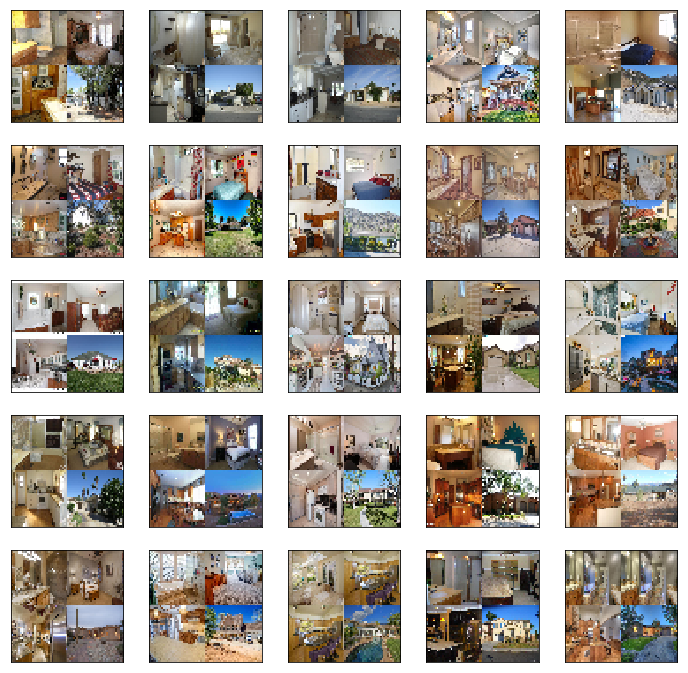

In [14]:
plot_image_label_prediction(testImagesX,0,25)

# Model

In [3]:
#from tensorflow.keras.applications import MobileNet
#from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.xception import Xception
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import preprocess_input
#from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Input,BatchNormalization,Flatten,concatenate,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.constraints import max_norm,unit_norm,min_max_norm
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend
tensorflow.keras.backend.clear_session #this function will clear the cache to delete all checkpoints


<function tensorflow.python.keras.backend.clear_session()>

In [4]:
os.environ["http_proxy"]='10.41.69.79:13128'
os.environ["https_proxy"]='10.41.69.79:13128'
image_input = Input(shape=(64,64,3),name='image_input')
#attr_input = Input(shape=(52),name='attr_input')
baseImage_model = Xception(weights='imagenet',input_tensor=image_input,include_top=False)
for layer in baseImage_model.layers:
    layer.trainable=True
# for layer in base_model.layers[:50]:
#     layer.trainable=False  
baseImage_model.summary()
imgx = baseImage_model.output
imgx = GlobalAveragePooling2D()(imgx)
imgx = Dense(16,activation='relu',kernel_constraint=unit_norm(),name='IMGdense16')(imgx)
imgx = BatchNormalization(axis=-1)(imgx)
imgx = Dropout(0.5)(imgx)
imgx = Dense(4,activation='relu',kernel_constraint=unit_norm(),name='IMGdense4')(imgx)
Image_model = Model(baseImage_model.input,imgx)
Image_model.summary()

W0725 06:35:35.821594 140369874097920 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- Tunnel connection failed: 503 Service Unavailable

In [18]:
Attr_model = Sequential()
Attr_model.add(Dense(8,input_dim=trainAttrX.shape[1],activation='relu',kernel_constraint=unit_norm(),name='AttrDense8'))
Attr_model.add(Dense(4,activation='relu',kernel_constraint=unit_norm(),name='AttrDense4'))
Attr_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AttrDense8 (Dense)           (None, 8)                 424       
_________________________________________________________________
AttrDense4 (Dense)           (None, 4)                 36        
Total params: 460
Trainable params: 460
Non-trainable params: 0
_________________________________________________________________


In [19]:
CombinedInput = concatenate([Image_model.output,Attr_model.output])
x = Dense(4,activation='relu',kernel_constraint=unit_norm(),name='CombinedDense4')(CombinedInput)
x = Dense(1,activation='linear',name='CombinedDenseLinear')(x)
CombinedModel = Model(inputs=[Image_model.input,Attr_model.input],outputs=x)
CombinedModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 31, 31, 32)   864         image_input[0][0]                
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 31, 31, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 31, 31, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

# Train

In [43]:
opt = Adam(lr=1e-8, decay=1e-3 / 200)
CombinedModel.compile(loss="mean_absolute_percentage_error", optimizer=opt)
CombModelHistory = CombinedModel.fit([trainImagesX,trainAttrX], trainPriceY,validation_data=([testImagesX,testAttrX], testPriceY),epochs=200, batch_size=5)


Train on 421 samples, validate on 106 samples
Epoch 1/200
421/421 [==============================] - 15s 35ms/step - loss: 18.6505 - val_loss: 33.0317
Epoch 2/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6502 - val_loss: 33.0312
Epoch 3/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6499 - val_loss: 33.0308
Epoch 4/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6495 - val_loss: 33.0305
Epoch 5/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6492 - val_loss: 33.0301
Epoch 6/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6489 - val_loss: 33.0298
Epoch 7/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6486 - val_loss: 33.0293
Epoch 8/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6483 - val_loss: 33.0288
Epoch 9/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6479 - val_loss: 33.0285
Epoch 10/200
421/421 [===

421/421 [==============================] - 3s 8ms/step - loss: 18.6057 - val_loss: 32.9792
Epoch 158/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6055 - val_loss: 32.9790
Epoch 159/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6052 - val_loss: 32.9787
Epoch 160/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6049 - val_loss: 32.9783
Epoch 161/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6047 - val_loss: 32.9781
Epoch 162/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6044 - val_loss: 32.9778
Epoch 163/200
421/421 [==============================] - 4s 8ms/step - loss: 18.6041 - val_loss: 32.9775
Epoch 164/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6039 - val_loss: 32.9771
Epoch 165/200
421/421 [==============================] - 3s 8ms/step - loss: 18.6036 - val_loss: 32.9769
Epoch 166/200
421/421 [==============================] - 3s 8ms/step 

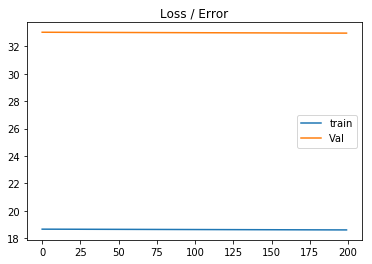

In [44]:
plt.title('Loss / Error')
plt.plot(CombModelHistory.history['loss'], label='train')
plt.plot(CombModelHistory.history['val_loss'], label='Val')
plt.legend()
plt.show()

In [45]:
preds = CombinedModel.predict([testImagesX,testAttrX])
diff = preds.flatten() - testPriceY
percentDiff = (diff / testPriceY) * 100
abspercentDiff = np.abs(percentDiff) #絕對值
mean = np.mean(abspercentDiff)
std = np.std(abspercentDiff)
print(abspercentDiff)

print(mean)
print(std)

452     13.339606
359      4.532676
420      0.648192
177      5.238858
108     35.442726
469     12.916937
167     29.818707
451     13.934583
328      8.533020
138     27.563845
69     213.333223
371     23.092838
178      5.353480
529      7.285176
197     13.391214
379     18.534728
322     32.074007
507     61.962725
17      15.574491
435      9.677308
29      30.381276
316     60.671281
226     23.664563
282      9.236293
11      11.164812
380     21.461090
494     29.053811
295     19.833478
275     22.574054
195     13.155726
          ...    
228     18.142077
394     69.422769
277      1.020047
253     62.478847
9       28.646129
220     26.270744
43      30.265508
312     10.542081
286      9.670273
440     18.768421
431     19.457046
311     24.041740
468     16.172183
174      4.534272
479     66.597506
39      27.864273
453      3.565808
353     13.876466
219     26.075206
63     221.876548
5       28.321801
417     10.823835
364      5.615916
498      6.373183
525      4

In [46]:
print("[INFO] avg. house price: {}, std house price: {}".format(df["price"].mean(),df["price"].std()))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] avg. house price: 592725.6242884251, std house price: 511032.0023708039
[INFO] mean: 32.97%, std: 68.58%


# For Better Model

In [101]:
import pandas as pd
cols = ["bedrooms","bathrooms","area","zipcode","price"]
txtpath = './dataset/HousesInfo.txt'
df = pd.read_csv(txtpath,sep=" ",header=None,names=cols)
df = df.drop_duplicates()
df = df.dropna()
df.head()
#df is to print all data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500.0
1,4,3.0,3343,36372,865200.0
2,3,4.0,3923,85266,889000.0
3,5,5.0,4022,85262,910000.0
4,3,4.0,4116,85266,971226.0


In [102]:
zipcodes = df["zipcode"].value_counts().keys().tolist() #unique zipcodes
counts = df["zipcode"].value_counts().tolist()
print(len(zipcodes),zipcodes,counts,sep='\n')

49
[92276, 93510, 93446, 92880, 94501, 91901, 92677, 94531, 85255, 93111, 92021, 85266, 81524, 95220, 92802, 96019, 85262, 62234, 98021, 91752, 85377, 60002, 62214, 81418, 62025, 92692, 92253, 60016, 93924, 90211, 90038, 93314, 90265, 93105, 92040, 62249, 95008, 91915, 62034, 85331, 94565, 94568, 92543, 60046, 62088, 81521, 36372, 93720, 90803]
[99, 60, 54, 47, 40, 32, 26, 22, 12, 11, 11, 11, 11, 10, 9, 9, 9, 7, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [103]:
# For Better Accuracy
# loop over each of the unique zip codes and their corresponding
# count
for (zipcode, count) in zip(zipcodes, counts):
    # the zip code counts for our housing dataset is *extremely*
    # unbalanced (some only having 1 or 2 houses per zip code)
    # so let's sanitize our data by removing any houses with less
    # than 25 houses per zip code
    if count < 20:
        idxs = df[df["zipcode"] == zipcode].index
        df.drop(idxs, inplace=True)

In [104]:
images = load_house_images(df,'/notebooks/notebook/Houses-dataset/Houses Dataset')
images.shape

(380, 64, 64, 3)

In [105]:
from sklearn.preprocessing import StandardScaler
def onehot_numerial_separate_attributes(df,data):
    continuous = ['bedrooms','bathrooms','area']
    mms = MinMaxScaler()
    data_continuous = mms.fit_transform(data[continuous])
    
    lb = LabelBinarizer().fit(df['zipcode'])
    data_categorical = lb.transform(data['zipcode'])
    
    return (data_continuous,data_categorical)

In [115]:
(trainAttrX, testAttrX, trainImagesX, testImagesX) = train_test_split(df,images,test_size=0.2)
#print(trainAttrX.loc[trainAttrX['price']==0])

maxPrice = trainAttrX['price'].max()
trainPriceY = trainAttrX['price'] / maxPrice
testPriceY = testAttrX['price'] / maxPrice

(trainAttrX, testAttrX) = onehot_numerial_combine_attributes(df,trainAttrX, testAttrX)
print(trainAttrX)

[[0.14285714 0.16666667 0.02967597 ... 0.         1.         0.        ]
 [0.28571429 0.33333333 0.18270773 ... 0.         0.         0.        ]
 [0.57142857 0.33333333 0.28136028 ... 0.         0.         0.        ]
 ...
 [0.14285714 0.08333333 0.04651909 ... 0.         1.         0.        ]
 [0.57142857 0.41666667 0.41321784 ... 1.         0.         0.        ]
 [0.14285714 0.16666667 0.03657363 ... 0.         1.         0.        ]]


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [116]:
print(trainAttrX.shape)
#print(trainAttrCateX.shape)
print(trainImagesX.shape)
print(trainPriceY.shape)
print(testAttrX.shape)
#print(testAttrCateX.shape)
print(testImagesX.shape)
print(testPriceY.shape)

(304, 11)
(304, 64, 64, 3)
(304,)
(76, 11)
(76, 64, 64, 3)
(76,)


In [117]:
# initialize the input shape and channel dimension, assuming
# TensorFlow/channels-last ordering
inputShape = (64, 64, 3)
chanDim = -1

# define the model input
inputs = Input(shape=inputShape)

# loop over the number of filters
for (i, f) in enumerate((16,32,64)):
    # if this is the first CONV layer then set the input
    # appropriately
    if i == 0:
        x = inputs

    # CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3),activation='relu', padding="same")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
# flatten the volume, then FC => RELU => BN => DROPOUT
x = Flatten()(x)
x = Dense(16,activation='relu')(x)
x = BatchNormalization(axis=chanDim)(x)
x = Dropout(0.5)(x)

# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
x = Dense(4,activation='relu')(x)

# construct the CNN
im2 = Model(inputs, x)
im2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization_23 (Batc (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
__________

In [118]:
amcon = Sequential()

amcon.add(Dense(8,input_dim=trainAttrX.shape[1],activation='relu',name='AttrConDense8'))
amcon.add(Dense(4,activation='relu',name='AttrConDense4'))
amcon.summary()

# amcate = Sequential()

# amcate.add(Dense(8,input_dim=trainAttrCateX.shape[1],activation='relu',name='AttrCateDense8'))
# amcate.add(Dense(4,activation='relu',name='AttrCateDense4'))
# amcate.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AttrConDense8 (Dense)        (None, 8)                 96        
_________________________________________________________________
AttrConDense4 (Dense)        (None, 4)                 36        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [119]:
ci = concatenate([im2.output,amcon.output])
ci = Dense(4,activation='relu',name='CombinedDense4')(ci)
ci = Dense(1,activation='linear',name='CombinedDenseLinear')(ci)
cm2 = Model(inputs=[im2.input,amcon.input],outputs=ci)
cm2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 64, 64, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 64, 64, 16)   64          conv2d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 32, 32, 16)   0           batch_normalization_23[0][0]     
__________________________________________________________________________________________________
conv2d_19 

In [79]:
from keras.callbacks import LearningRateScheduler
import math
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [123]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=100)
cm2.compile(loss="mean_absolute_percentage_error", optimizer=opt)
cm2history = cm2.fit([trainImagesX,trainAttrX], trainPriceY,validation_data=([testImagesX,testAttrX], testPriceY),epochs=200, batch_size=5)


Train on 304 samples, validate on 76 samples
Epoch 1/200
304/304 [==============================] - 12s 38ms/step - loss: 79.5807 - val_loss: 275.0400
Epoch 2/200
304/304 [==============================] - 0s 2ms/step - loss: 47.3436 - val_loss: 184.7650
Epoch 3/200
304/304 [==============================] - 1s 2ms/step - loss: 39.8229 - val_loss: 95.2180
Epoch 4/200
304/304 [==============================] - 0s 2ms/step - loss: 34.4433 - val_loss: 44.9220
Epoch 5/200
304/304 [==============================] - 0s 1ms/step - loss: 31.8961 - val_loss: 97.5203
Epoch 6/200
304/304 [==============================] - 1s 2ms/step - loss: 32.9293 - val_loss: 43.2776
Epoch 7/200
304/304 [==============================] - 1s 2ms/step - loss: 29.5703 - val_loss: 35.3615
Epoch 8/200
304/304 [==============================] - 1s 2ms/step - loss: 30.2756 - val_loss: 35.9185
Epoch 9/200
304/304 [==============================] - 1s 2ms/step - loss: 28.2649 - val_loss: 35.2816
Epoch 10/200
304/304 [==

304/304 [==============================] - 1s 2ms/step - loss: 19.6287 - val_loss: 31.1691
Epoch 158/200
304/304 [==============================] - 0s 1ms/step - loss: 18.8581 - val_loss: 28.4578
Epoch 159/200
304/304 [==============================] - 1s 2ms/step - loss: 18.7858 - val_loss: 29.4185
Epoch 160/200
304/304 [==============================] - 0s 1ms/step - loss: 19.0815 - val_loss: 28.7450
Epoch 161/200
304/304 [==============================] - 1s 2ms/step - loss: 18.7377 - val_loss: 30.6442
Epoch 162/200
304/304 [==============================] - 0s 2ms/step - loss: 18.7588 - val_loss: 33.6207
Epoch 163/200
304/304 [==============================] - 1s 2ms/step - loss: 19.4145 - val_loss: 31.5970
Epoch 164/200
304/304 [==============================] - 0s 1ms/step - loss: 19.0887 - val_loss: 27.8859
Epoch 165/200
304/304 [==============================] - 1s 2ms/step - loss: 19.3651 - val_loss: 30.2409
Epoch 166/200
304/304 [==============================] - 0s 1ms/step 

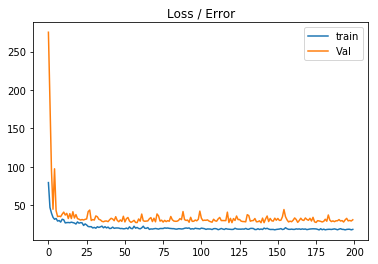

In [124]:
plt.title('Loss / Error')
plt.plot(cm2history.history['loss'], label='train')
plt.plot(cm2history.history['val_loss'], label='Val')
plt.legend()
plt.show()

In [126]:
preds = cm2.predict([testImagesX,testAttrX])
diff = preds.flatten() - testPriceY
percentDiff = (diff / testPriceY) * 100
abspercentDiff = np.abs(percentDiff) #絕對值
mean = np.mean(abspercentDiff)
std = np.std(abspercentDiff)
print(abspercentDiff)

print(mean)
print(std)

98      16.542447
194     21.265464
316     15.072257
403     15.465809
459     22.847494
473      6.590687
439     36.260932
432     25.335089
361     66.374177
32      17.123836
322      4.236692
251     18.607944
405     36.320111
355     35.334956
88       1.985488
176     37.055424
348     12.086076
177     24.900838
370     10.885629
490     21.080404
367     35.610126
329     16.561531
397      8.237627
401     35.610126
458     43.968870
531     41.530234
299      7.742278
175     12.418760
461     34.709515
142     23.423644
          ...    
212     10.884273
320     54.388104
334     52.927963
100     35.769237
420     31.219908
338     43.956962
398      8.860578
283     15.256465
472     43.656511
416     12.922539
290     34.210347
422     24.545501
360     19.146616
384     45.569711
182      0.916428
241     20.872959
186     61.547026
532     35.792020
94     338.286444
362      1.742725
286     53.583987
288     22.797856
358     54.804002
195     11.558939
500     36